<a href="https://colab.research.google.com/github/Rafe2001/Resume-Screening-App/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
df = pd.read_csv("/content/UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.shape

(962, 2)

In [ ]:
df.isna().sum()

Category    0
Resume      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [ ]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

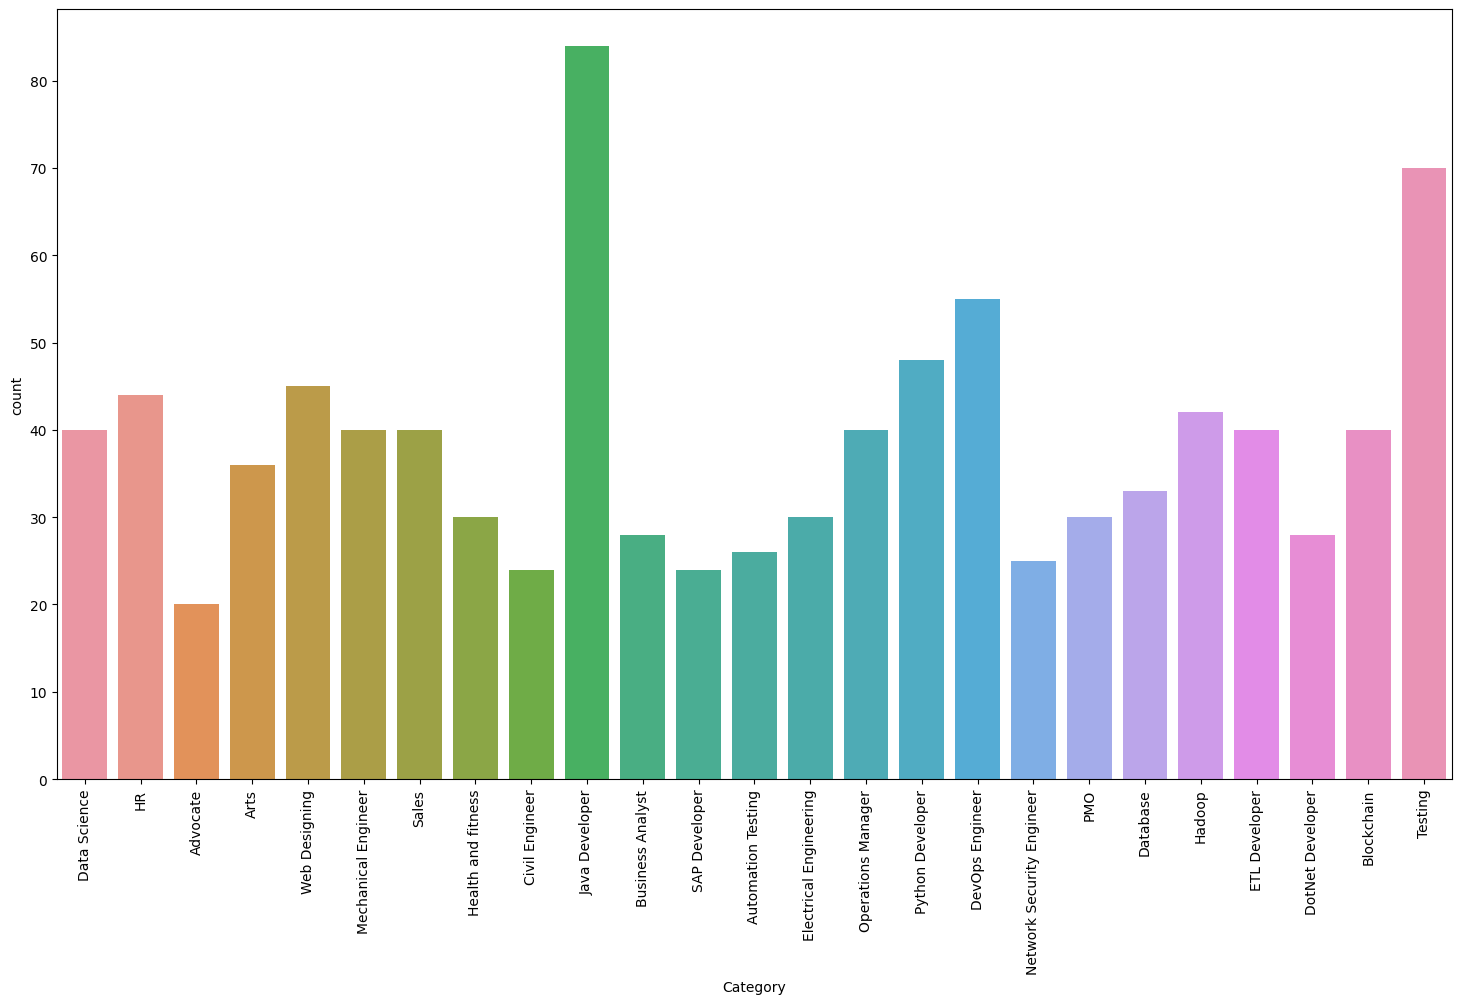

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)
plt.show()

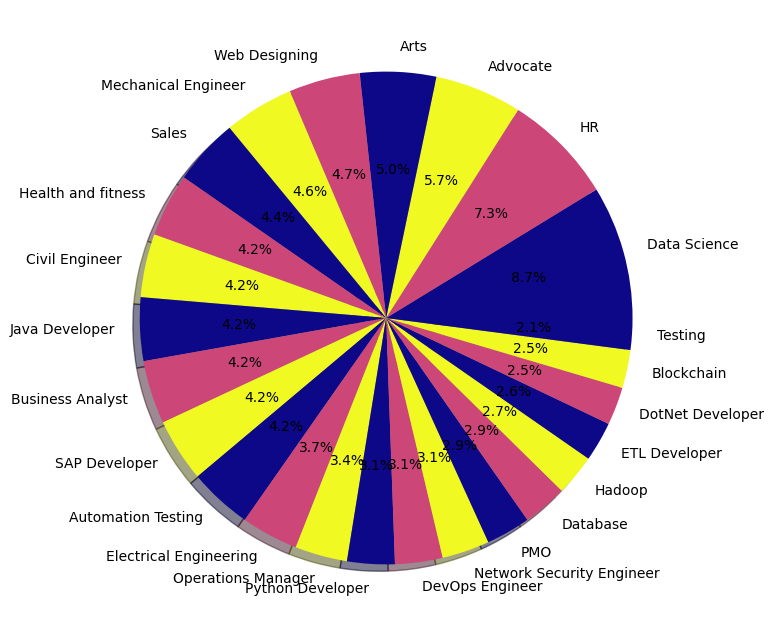

In [ ]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,8))
plt.pie(counts, labels= labels,autopct='%1.1f%%', shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

## Convert categorical words

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [ ]:
df['Category'].head()

0    6
1    6
2    6
3    6
4    6
Name: Category, dtype: int64

In [ ]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## Cleaning Texts

In [ ]:
def preprocess_text(text):
  text = re.sub('http\S+\s',' ',text)
  text = re.sub('RT|cc',' ',text)
  text = re.sub('@\S+',' ', text)
  text = re.sub('#\S+\s',' ',text)
  text = re.sub('[%s]' % re.escape("""|"#$%%'()"+,-./:;<=>?@[\]^_'{|}~*"""), ' ', text)
  text = re.sub(r'[^\x00-\x7f]', ' ', text)
  text = re.sub('\s+', ' ', text)
  return text

In [ ]:
df['Clean_Resume'] = df['Resume'].apply(lambda x: preprocess_text(x))

In [ ]:
df.head()

,Category,Resume,Clean_Resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


## Vectorize the text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Clean_Resume'])
clean_text = tfidf.transform(df['Clean_Resume'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_text,df['Category'], test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape)

(769, 7351) (193, 7351)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
def predict_model(model, X_train, X_test,y_train, y_test):
  model.fit( X_train,y_train)
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  accuracy = accuracy_score(y_pred, y_test)
  accuracy_train = accuracy_score(y_pred_train, y_train)
  return accuracy, accuracy_train

In [ ]:
predict_model(RandomForestClassifier(), X_train, X_test,y_train, y_test)

(0.9948186528497409, 1.0)

In [ ]:
predict_model(MultinomialNB(), X_train, X_test,y_train, y_test)

(0.9222797927461139, 0.9752925877763329)

In [ ]:
#predict_model(OneVsRestClassifier(KNeighborsClassifier()),X_train, X_test,y_train, y_test)

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"The accuracy of the model is {accuracy*100}")

The accuracy of the model is 99.48186528497409


In [ ]:
'''import pickle

vector = open('tfidf.pkl','wb')
pickle.dump(tfidf, vector)

model = open('cls.pkl','wb')
pickle.dump(classifier, model)'''

"import pickle\n\nvector = open('tfidf.pkl','wb')\npickle.dump(tfidf, vector)\n\nmodel = open('cls.pkl','wb')\npickle.dump(classifier, model)"

In [ ]:
import joblib

joblib.dump(classifier,"clf.joblib")
joblib.dump(tfidf,"tfidf.joblib")

['tfidf.joblib']

In [ ]:
text_resume = """
Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery
Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis
Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF
PCA & Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib
ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and
understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate
Ernst & Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany
Details company Ernst & Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW
TAR Technology Assisted Review assists in a elerating the review process and run analytics and generate reports Core member of
a team helped in developing automated review platform tool from scratch for assisting E discovery domain this tool implements predictive
coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyers review
Understand the end to end flow of the solution doing research and development for classification models predictive analysis
and mining of the information present in text data Worked on analyzing the outputs and precision monitoring for the entire tool
TAR assists in predictive coding topic modelling from the evidence by following EY standards Developed the classifier models in
order to identify red flags and fraud related issues Tools & Technologies Python scikit learn tfidf word2vec doc2vec cosine similarity
Na ve Bayes LDA NMF for topic modelling Vader and text blob for sentiment analysis Matplot lib Tableau dashboard for reporting
MULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS USA CLIENTS TEXT ANALYTICS MOTOR VEHICLE CUSTOMER REVIEW DATA Received customer feedback
survey data for past one year Performed sentiment Positive Negative & Neutral and time series analysis on customer comments
across all 4 categories Created heat map of terms by survey category based on frequency of words Extracted Positive and
Negative words across all the Survey categories and plotted Word cloud Created customized tableau dashboards for effective
reporting and visualizations CHATBOT Developed a user friendly chatbot for one of our Products which handle simple questions
about hours of operation reservation options and so on This chat bot serves entire product related questions Giving overview
of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer
This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant recommended
questions Tools & Technologies Python Natural language processing NLTK spacy topic modelling Sentiment analysis Word Embedding
scikit learn JavaScript JQuery SqlServer INFORMATION GOVERNANCE Organizations to make informed decisions about all of the
information they store The integrated Information Governance portfolio synthesizes intelligence across unstructured data
sources and facilitates action to ensure organizations are best positioned to counter information risk Scan data from multiple
sources of formats and parse different file formats extract Meta data information push results for indexing elastic search
and created customized interactive dashboards using kibana Preforming ROT Analysis on the data which give information of data
which helps identify content that is either Redundant Outdated or Trivial Preforming full text search analysis on elastic
search with predefined methods which can tag as PII personally identifiable information social security numbers addresses
names etc which frequently targeted during cyber attacks Tools & Technologies Python Flask Elastic Search Kibana
FRAUD ANALYTIC PLATFORM Fraud Analytics and investigative platform to review all red flag cases FAP is a Fraud Analytics
and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems It can be used by clients
to interrogate their A ounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics
Tools & Technologies HTML JavaScript SqlServer JQuery CSS Bootstrap Node js D3 js DC js
"""

In [ ]:
#tfidf = pickle.load(open('/content/tfidf.pkl','rb'))
tfidf = joblib.load("/content/tfidf.joblib")
model = joblib.load("/content/clf.joblib")

In [ ]:
#model = pickle.load(open('/content/clf.pkl','rb'))

In [ ]:
clean_resume = preprocess_text(text_resume)
resume = tfidf.transform([clean_resume])
predict_id = model.predict(resume)[0]

categories = ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing', 'Mechanical Engineer',
              'Sales', 'Health and fitness', 'Civil Engineer', 'Java Developer', 'Business Analyst',
              'SAP Developer', 'Automation Testing', 'Electrical Engineering', 'Operations Manager',
              'Python Developer', 'DevOps Engineer', 'Network Security Engineer', 'PMO', 'Database',
              'Hadoop', 'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']

numerical_forms = [6, 12, 0, 1, 24, 16, 22, 14, 5, 15, 4, 21, 2, 11, 18, 20, 8, 17, 19, 7, 13, 10, 9, 3, 23]

# Create a category mapping dictionary
category_mapping = dict(zip(numerical_forms, categories))

category_name = category_mapping.get(predict_id,"unknown")
print("predicted_category:", category_name)
print(predict_id)

predicted_category: Data Science
6


In [123]:
import sklearn
print("Scikit-Learn version:", sklearn.__version__)

Scikit-Learn version: 1.2.2


In [124]:
print(category_mapping)

{6: 'Data Science', 12: 'HR', 0: 'Advocate', 1: 'Arts', 24: 'Web Designing', 16: 'Mechanical Engineer', 22: 'Sales', 14: 'Health and fitness', 5: 'Civil Engineer', 15: 'Java Developer', 4: 'Business Analyst', 21: 'SAP Developer', 2: 'Automation Testing', 11: 'Electrical Engineering', 18: 'Operations Manager', 20: 'Python Developer', 8: 'DevOps Engineer', 17: 'Network Security Engineer', 19: 'PMO', 7: 'Database', 13: 'Hadoop', 10: 'ETL Developer', 9: 'DotNet Developer', 3: 'Blockchain', 23: 'Testing'}
